In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## PCA 실습

### 예제3. 이미지 압축

In [2]:
fruits = np.load('data/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [4]:
fruits[0].shape

(100, 100)

- 이미지 출력

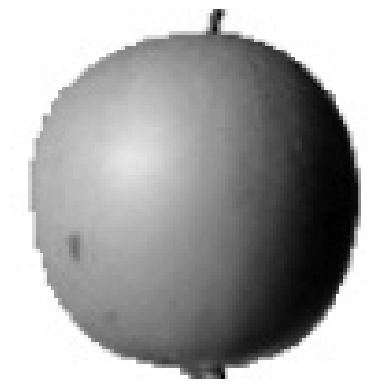

In [5]:
plt.imshow(fruits[0], cmap='gray_r')
plt.axis('off')
plt.show()

In [15]:
def draw_fruits(data, rows, cols):
    fig, ax = plt.subplots(figsize=(cols, rows), nrows= rows, ncols=cols)
    
    for i in range(rows):
        for h in range(cols):
            ax[i][h].imshow(data[i*cols + h], cmap='gray_r')
            ax[i][h].axis('off')
    plt.show()

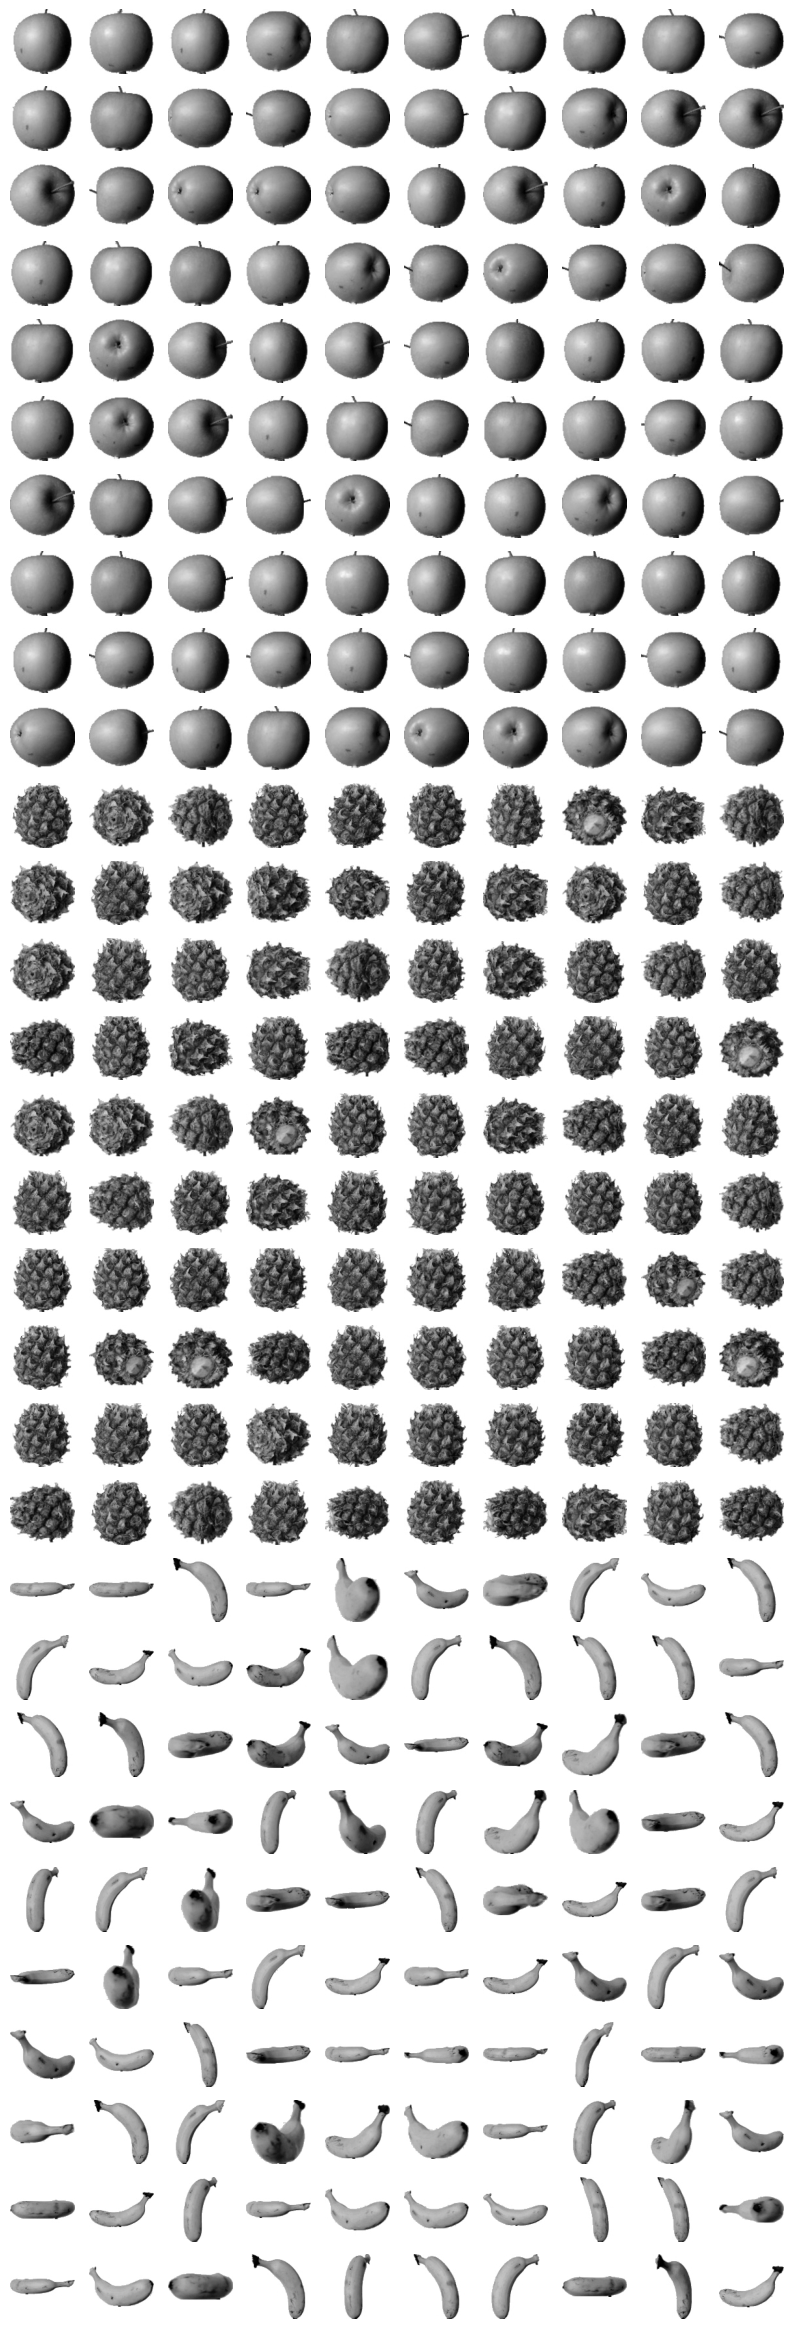

In [9]:
draw_fruits(fruits, rows=30, cols=10)

In [10]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

#### PCA를 적용하여 분류 성능 예측/시각화

- RandomForestClassifier, LogisticRegression 두가지로 성능 확인
- n_components = 50

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)
pca.components_.shape

(50, 10000)

- 50개 주성분의 특징 시각화

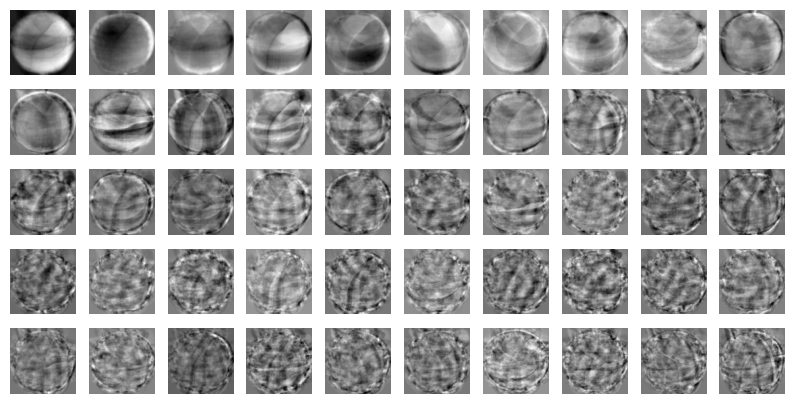

In [16]:
# 10000개 데이터 -> comp 1 ~ 50 / 50차원으로
pca_comp = pca.components_.reshape(-1,100,100)

draw_fruits(pca_comp, rows=5, cols=10)

In [17]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

- 50개 주성분이 설명하는 분산 비율

In [23]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486382, 0.00480345,
       0.00447836, 0.00437319, 0.00408041, 0.00389474, 0.00372439,
       0.0035928 , 0.00331474, 0.00317837, 0.0030434 , 0.00303706,
       0.00288857, 0.00275834, 0.00264908, 0.00255741, 0.00252142,
       0.00247369, 0.00238955, 0.00230763, 0.00221943, 0.0021685 ,
       0.0021353 , 0.00196388, 0.00192761, 0.00191101, 0.00185267,
       0.00183189, 0.00173713, 0.0016998 , 0.00163799, 0.00162064])

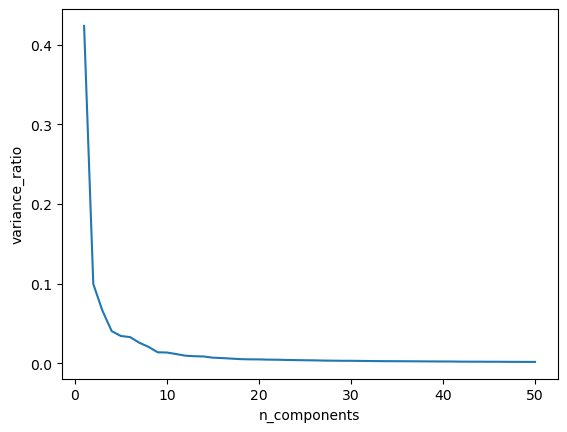

In [21]:
plt.plot(range(1,51), pca.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('variance_ratio')
plt.show()

In [25]:
np.round(np.sum(pca.explained_variance_ratio_),2)

0.92

#### 원본 이미지로 재구성

- inverse_transform() 메서드

In [29]:
# pca로 변환한 데이터를 원본데이터로 변환
fruits_inv = pca.inverse_transform(fruits_pca)
fruits_inv.shape

(300, 10000)

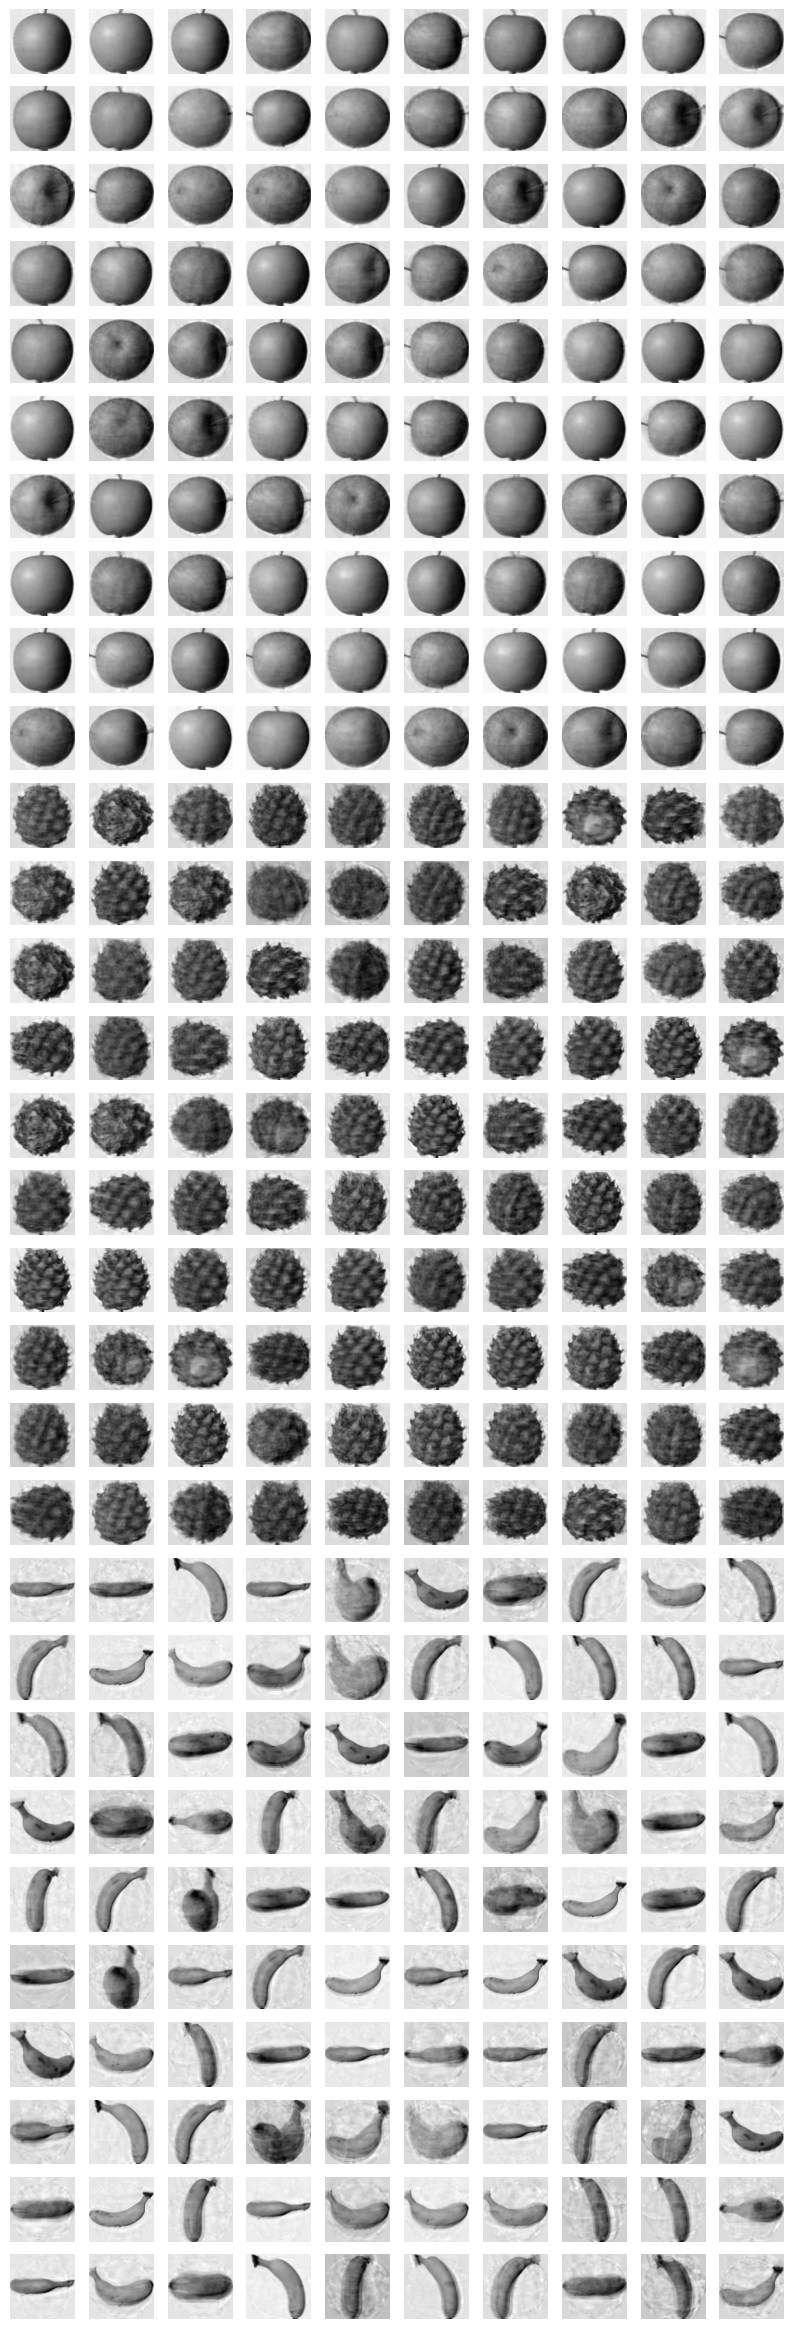

In [30]:
draw_fruits(fruits_inv.reshape(-1,100,100), rows=30, cols=10)

#### 원본데이터를 분류하고 성능예측

- RandomForestClassifier, LogisticRegression 두가지로 성능 확인

In [32]:
from sklearn.model_selection import cross_val_score
y = np.array([0] * 100 + [1] * 100 + [2] * 100)

rf = RandomForestClassifier(random_state=156)
lr = LogisticRegression()

In [36]:
print('-- 원본 데이터에 대한 분류 성능 비교 --')
for model in [rf, lr]:
    scores = cross_val_score(model, fruits_2d , y, scoring= 'accuracy', cv= 3)
    print(f'{model.__class__.__name__} 교차검증(cv= 3) 결과')
    print(f' - 개별 정확도: {np.round(scores,4)}')
    print(f' - 평균 정확도: {np.mean(scores):.4f}')
    print('=========================================================')
    print()

-- 원본 데이터에 대한 분류 성능 비교 --
RandomForestClassifier 교차검증(cv= 3) 결과
 - 개별 정확도: [1.   1.   0.99]
 - 평균 정확도: 0.9967

LogisticRegression 교차검증(cv= 3) 결과
 - 개별 정확도: [1.   1.   0.99]
 - 평균 정확도: 0.9967



#### PCA 변환 데이터를 분류하고 성능예측

In [37]:
print('-- PCA 변환 데이터에 대한 분류 성능 비교 --')
for model in [rf, lr]:
    scores = cross_val_score(model, fruits_pca, y, scoring= 'accuracy', cv= 3)
    print(f'{model.__class__.__name__} 교차검증(cv= 3) 결과')
    print(f' - 개별 정확도: {np.round(scores,4)}')
    print(f' - 평균 정확도: {np.mean(scores):.4f}')
    print('=========================================================')
    print()

-- PCA 변환 데이터에 대한 분류 성능 비교 --
RandomForestClassifier 교차검증(cv= 3) 결과
 - 개별 정확도: [1.   1.   0.99]
 - 평균 정확도: 0.9967

LogisticRegression 교차검증(cv= 3) 결과
 - 개별 정확도: [1. 1. 1.]
 - 평균 정확도: 1.0000



------